## **Local Regression - a Trivial Implementation**
### This notebook is a hands-on study of the implementation of local regression, a technique used in time series analysis.

## Local regression is a smoothing technique that applies, as the name suggests, a linear regression using a defined k window as training data for each point in the series. This implementation uses a non-weighted window, so each model at each point is trained with the original data.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import time

In [2]:
data = pd.read_csv("/kaggle/input/daily-website-visitors/daily-website-visitors.csv", parse_dates=["Date"], thousands=',')
data = data.set_index("Date").to_period('D')
data.head()

,Row,Day,Day.Of.Week,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Date,,,,,,,
2014-09-14,1,Sunday,1,2146,1582,1430,152
2014-09-15,2,Monday,2,3621,2528,2297,231
2014-09-16,3,Tuesday,3,3698,2630,2352,278
2014-09-17,4,Wednesday,4,3667,2614,2327,287
2014-09-18,5,Thursday,5,3316,2366,2130,236


<Axes: title={'center': 'Original Data'}, xlabel='Date'>

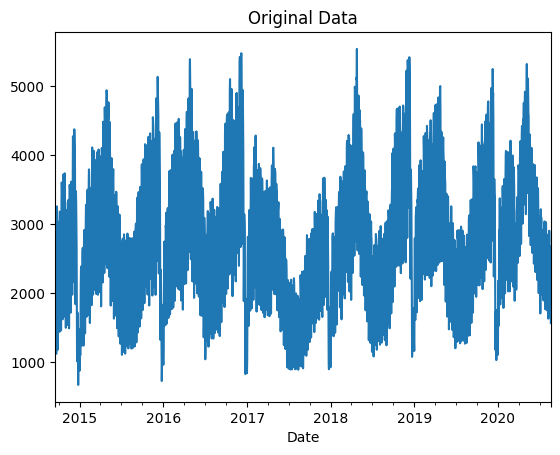

In [3]:
data["Unique.Visits"].plot(title="Original Data")

In [4]:
def local_regression(k, data):
    """
    Perform local regression on the input data with a window size k.
    
    Parameters:
    k (int): The window size for local regression. Must be an odd number.
    data (np.array): The input data array.
    
    Returns:
    np.array: The smoothed data.
    """
    k = k if k % 2 != 0 else k + 1
    fitted_points = np.zeros(data.size)
    
    for i in range(data.size):
        window_side = k // 2
        left_half = max(0, i - window_side)
        right_half = min(data.size - 1, i + window_side)
        data_train = data[left_half:right_half + 1]
        linear_m = LinearRegression(fit_intercept=True)
        x = np.array(list(range(left_half, right_half + 1))).reshape(-1, 1)
        
        try:
            linear_m.fit(x, data_train)
        except Exception as e:
            print(f"Error at index {i}: {e}")
            continue
        
        fitted_points[i] = linear_m.predict([[i]])[0][0]
    
    return fitted_points

In [5]:
k = 15
smoothed_data = local_regression(k, data["Unique.Visits"].values.reshape(-1, 1))

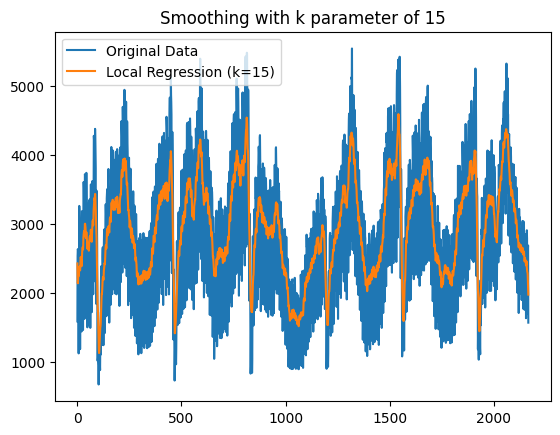

In [6]:
plt.plot(data["Unique.Visits"].values, label="Original Data")
plt.plot(smoothed_data, label=f"Local Regression (k={k})")
plt.title(f"Smoothing with k parameter of {k}")
plt.legend()
plt.show()

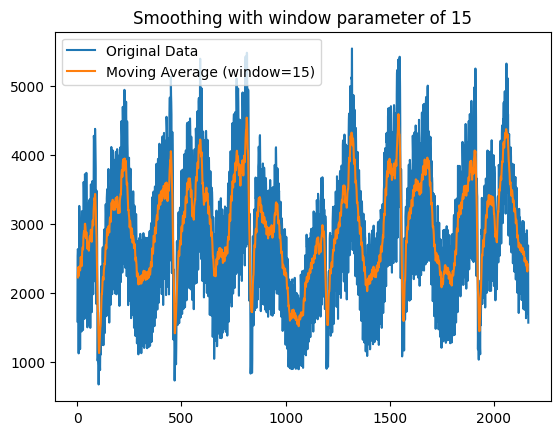

In [7]:
window_mavg = 15
moving_average = data["Unique.Visits"].rolling(window=window_mavg, center=True, min_periods=10).mean().to_frame()
plt.plot(data["Unique.Visits"].values, label="Original Data")
plt.plot(moving_average["Unique.Visits"].values, label=f"Moving Average (window={window_mavg})")
plt.title(f"Smoothing with window parameter of {window_mavg}")
plt.legend()
plt.show()

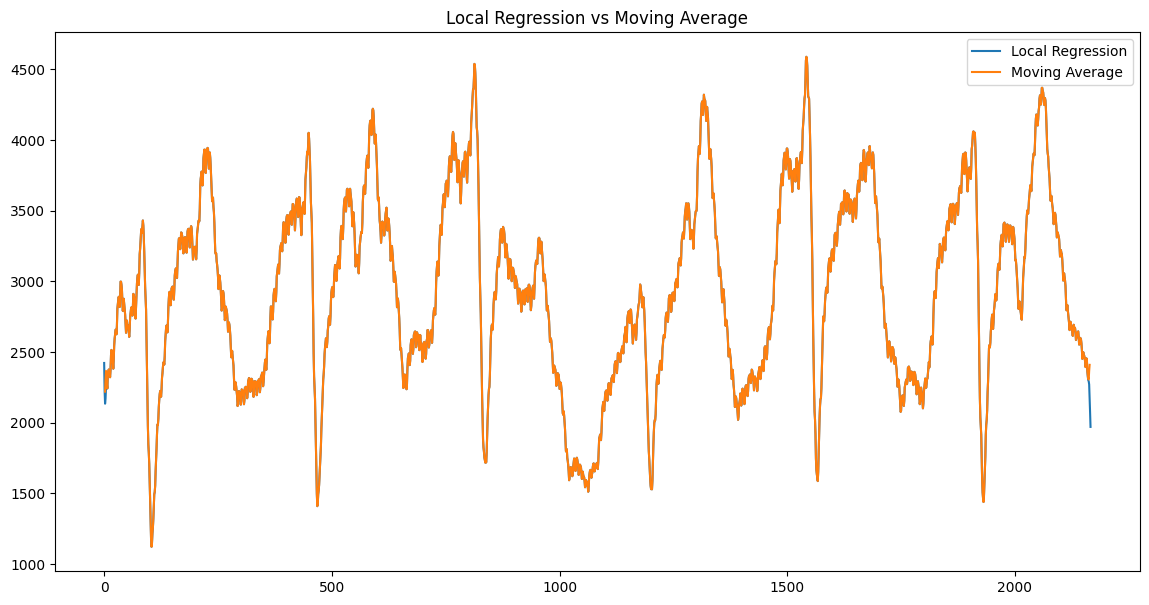

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(smoothed_data, label="Local Regression")
plt.plot(moving_average["Unique.Visits"].values, label="Moving Average")
plt.title("Local Regression vs Moving Average")
plt.legend()
plt.show()

## A non-weighted local regression differs from a moving average mainly in the extremes of the series, where the moving average suffers distortion due to the lack of data. This difference becomes clearer as the k value or the window size grows. Below, a larger window size is used to capture the trend-cycle of the data.

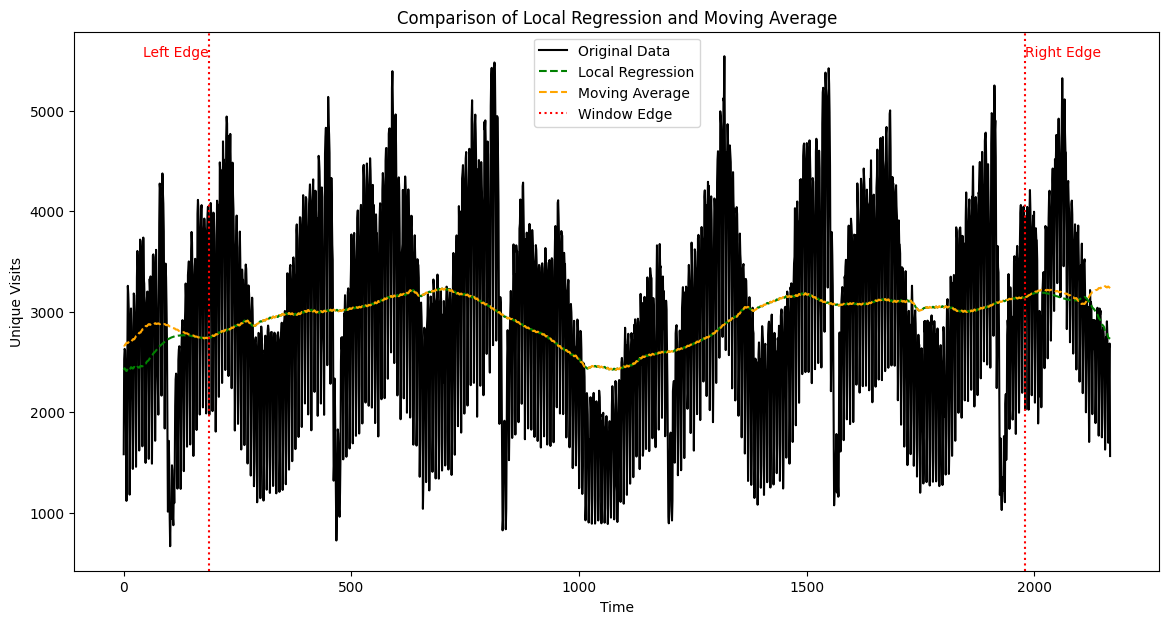

In [9]:
window_size = 375

local_regression_timer = time.time()
smoothed_data = local_regression(window_size, data["Unique.Visits"].values.reshape(-1, 1))
local_regression_timer = time.time() - local_regression_timer

moving_avg_timer = time.time()
moving_average = data["Unique.Visits"].rolling(window=window_size, center=True, min_periods=30).mean().to_frame()
moving_avg_timer = time.time() - moving_avg_timer

plt.figure(figsize=(14, 7))
plt.plot(data["Unique.Visits"].values, label='Original Data', color='black')
plt.plot(smoothed_data, label='Local Regression', linestyle='--', color='green')
plt.plot(moving_average.values, label='Moving Average', linestyle='--', color='orange')

# Highlight edges
left_edge = window_size // 2
right_edge = data["Unique.Visits"].size - window_size // 2

plt.axvline(left_edge, color='r', linestyle=':', label='Window Edge')
plt.axvline(right_edge, color='r', linestyle=':')

plt.text(left_edge, data["Unique.Visits"].max(), 'Left Edge', horizontalalignment='right', color='red')
plt.text(right_edge, data["Unique.Visits"].max(), 'Right Edge', horizontalalignment='left', color='red')

plt.legend()
plt.title('Comparison of Local Regression and Moving Average')
plt.xlabel('Time')
plt.ylabel('Unique Visits')
plt.show()

In [10]:
print(f"Dataset size: {data['Unique.Visits'].size} rows")
print(f"Local Regression processing time: {local_regression_timer:.4f} seconds")
print(f"Moving Average processing time: {moving_avg_timer:.4f} seconds")

Dataset size: 2167 rows
Local Regression processing time: 1.6376 seconds
Moving Average processing time: 0.0008 seconds


# Conclusion
## Smoothing-wise, local regression can be a better choice over the moving average to prevent distortion at the ends of the data. However, it has a significantly higher computational cost.

### Comment below if you see any errors in this notebook. Upvote and Thanks.